## Import Statements

In [1]:
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

## Reading Data in and Descriptive Statistics

In [2]:
#files = ['Instagram_7_year.csv','SZA_Chainsmoker_Insta.csv']
#df_list = [pd.read_csv(file) for file in files]
#df = pd.concat(df_list)

In [2]:
files = glob.glob('./InstagramData/*.csv')
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list)

In [3]:
df.columns

Index(['Account', 'User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Comments', 'Views', 'URL', 'Link', 'Photo', 'Description',
       'Sponsor Id', 'Sponsor Name', 'Score'],
      dtype='object')

##### Description of the fields: 
https://github.com/CrowdTangle/API/wiki/Post

In [4]:
df.shape

(435119, 15)

In [5]:
df.describe()

,Followers at Posting,Likes,Comments,Views,Sponsor Id
count,2.938570e+05,4.351190e+05,4.351190e+05,4.351190e+05,3.860000e+02
mean,1.009042e+07,1.054514e+05,1.478300e+03,7.875228e+04,1.001222e+09
std,1.701803e+07,2.876458e+05,6.439536e+03,5.160179e+05,1.744126e+09
min,1.105900e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.398370e+05
25%,1.398003e+06,7.625000e+03,9.400000e+01,0.000000e+00,8.628483e+07
50%,3.972056e+06,2.251200e+04,2.790000e+02,0.000000e+00,2.995531e+08
75%,1.114071e+07,7.555500e+04,9.300000e+02,0.000000e+00,1.153133e+09
max,1.586519e+08,1.347905e+07,1.047491e+06,4.428835e+07,8.482989e+09


In [6]:
df.sample(4).T

,24313,4229,37368,1217
Account,snoopdogg,DJ KHALED,French Montana,Ariana Grande
User Name,snoopdogg,djkhaled,frenchmontana,arianagrande
Followers at Posting,1.97787e+07,NaN,NaN,1.49787e+08
Created,2017-11-01 20:34:08 EDT,2012-08-19 13:18:50 EDT,2014-04-18 14:07:06 EDT,2019-03-29 13:00:17 EDT
Type,Video,Photo,Photo,Photo
Likes,11100,1284,6050,2419826
Comments,151,44,176,14496
Views,88742,0,0,0
URL,https://www.instagram.com/p/Ba-Q3FdD7mB/,https://instagram.com/p/OhI2k8Lu-u/,https://instagram.com/p/m8M5SIScOI/,https://www.instagram.com/arianagrande/p/BvmY4...
Link,https://www.instagram.com/p/Ba-Q3FdD7mB/,https://instagram.com/p/OhI2k8Lu-u/,https://instagram.com/p/m8M5SIScOI/,https://www.instagram.com/arianagrande/p/BvmY4...


In [7]:
#Convert Datetimes
df['Created'] = pd.to_datetime(df['Created'])

C:\Users\oldye\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Users\oldye\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [8]:
#Rename column
#df.rename(columns={'Created':'PostTime'},inplace=True)

In [9]:
df.sample(4).T

,25090,22980,37553,14496
Account,Becky G,snoopdogg,Miley Cyrus,Saint Laurent Don
User Name,iambeckyg,snoopdogg,mileycyrus,21savage
Followers at Posting,NaN,3.97206e+06,5.82241e+07,NaN
Created,2013-05-24 11:57:47,2014-10-19 13:24:51,2017-01-01 06:13:38,2016-08-28 01:45:28
Type,Photo,Photo,Photo,Photo
Likes,4322,17969,2201687,70100
Comments,31,245,24139,1818
Views,0,0,0,0
URL,https://www.instagram.com/p/Zs0kJlzEgj/,http://instagram.com/p/uV6UzYP9P4/,https://www.instagram.com/p/BOuDwS2hzrh/,https://www.instagram.com/p/BJpCCgMjhVa/
Link,https://www.instagram.com/p/Zs0kJlzEgj/,http://instagram.com/p/uV6UzYP9P4/,https://www.instagram.com/p/BOuDwS2hzrh/,https://www.instagram.com/p/BJpCCgMjhVa/


In [10]:
selected_columns = ['User Name', 'Followers at Posting', 'Created', 'Type', 'Likes', 'Comments', 'Views', 
                    'Description','Score']
df_selected = df[selected_columns]

In [11]:
df_selected.head()

,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,Description,Score
0,teddysphotos,30167887.0,2019-07-03 09:41:49,Album,322888,1703,0,Day 2 of trying to be @brunomars. BLOW is out ...,1.7
1,teddysphotos,30167887.0,2019-07-03 05:13:04,Video,174216,417,578676,Dropping my full interview with @cthagod next ...,-1.38
2,marshmellomusic,24003060.0,2019-07-03 00:16:03,Video,307739,2728,719921,"#JoytimeIII Out Now 🔥\n\nLMK what you think, t...",1.41
3,thegr8khalid,6924250.0,2019-07-02 21:43:12,Album,305853,1299,0,light on our feet,-1.09
4,ozuna,15141605.0,2019-07-02 20:02:34,Photo,216265,1152,0,👸🏻Con Motoro 😂😂😂😂😂,-1.21


In [12]:
df_selected.reset_index(inplace=True)

In [13]:
df_selected['Description'] = df_selected['Description'].astype(str)

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
#Number of characters in message custom feature
df_selected['description_length'] = df_selected['Description'].apply(len)

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#Number of hashtags custom feature
df_selected['hashtag_count'] = df_selected['Description'].apply(lambda x : x.count('#'))

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#Social Engagement Score
df_selected['social_engagement_score'] = (df_selected['Likes'] + df_selected['Comments']) / df_selected['Followers at Posting']

C:\Users\oldye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#Set the types.
print(Counter(df_selected['Type']))
types = ['Photo', 'Video', 'Album']
#Combine Photo and Album
df_selected.loc[df_selected.Type == 'Album', 'Type'] = "Photo"

Counter({'Photo': 330871, 'Video': 95027, 'Album': 9221})


C:\Users\oldye\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
Counter(df_selected['Type'])

Counter({'Photo': 340092, 'Video': 95027})

In [19]:
#OHE for Type Field
df_selected = pd.concat([df_selected,pd.get_dummies(df_selected['Type'],prefix='type')],axis=1)

In [20]:
def time_of_day_creation(x):
    '''
    Takes in an integer and returns one of four time slots:
    ['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    '''
    
    slots_out = ['created_12am-6am', 'created_6am-12pm', 'created_12pm-6pm', 'created_6pm-12am']
    slot0 = np.arange(0,6)
    slot1 = np.arange(6,12)
    slot2 = np.arange(12,18)
    slot3 = np.arange(18,24)

    if x in slot0:
        return slots_out[0]
    elif x in slot1:
        return slots_out[1]
    elif x in slot2:
        return slots_out[2]
    elif x in slot3:
        return slots_out[3]
    else:
        return 'NaN'
    

In [21]:
#Creating time of day buckets (e.g. 0-6am, 6-12pm, 12-6, 6-12am)
#time_of_day_creation(df_selected['Created'][200].hour)
#df_selected['time_of_day'] = [time_of_day_creation(x) for x in df_selected['Created']]

In [22]:
#Creating time of day buckets (e.g. 0-6am, 6-12pm, 12-6, 6-12am)
df_selected['time_of_day'] = df_selected['Created'].apply(lambda x : time_of_day_creation(x.hour))

In [23]:
#OHE for time of day field
df_selected = pd.concat([df_selected,pd.get_dummies(df_selected['time_of_day'])],axis=1)

In [24]:
Counter(df_selected['time_of_day'])

Counter({'created_6am-12pm': 70801,
         'created_12am-6am': 64714,
         'created_6pm-12am': 138885,
         'created_12pm-6pm': 160719})

In [25]:
#Time between prior and current post
df_selected.sort_values(by=['User Name','Created'], inplace=True)
df_selected['time_since_last_post'] = df_selected.groupby('User Name')['Created'].diff()

In [26]:
#Dropping extraneous columns 
df_selected.drop(['Likes','Comments','Views','time_of_day','index'],axis=1,inplace=True)
df_selected.drop('Type',axis=1,inplace=True)

In [27]:
df_selected[df_selected['User Name'] == 'shakira']

,User Name,Followers at Posting,Created,Description,Score,description_length,hashtag_count,social_engagement_score,type_Photo,type_Video,created_12am-6am,created_12pm-6pm,created_6am-12pm,created_6pm-12am,time_since_last_post
56933,shakira,NaN,2012-10-12 06:42:16,Good morning Baku! Buenos días Baku! Shak,-13.51,41,0,NaN,1,0,0,0,1,0,NaT
57003,shakira,NaN,2012-10-13 10:10:35,"""Sport, like #education, can help girls become...",-18.31,180,3,NaN,1,0,0,0,1,0,1 days 03:28:19
57035,shakira,NaN,2012-10-13 16:07:02,Congrats to the French team for winning the FI...,-27.81,230,0,NaN,1,0,0,1,0,0,0 days 05:56:27
57078,shakira,NaN,2012-10-14 11:58:16,"Getting ready for the show, see you in a bit #...",-10.02,107,1,NaN,1,0,0,0,1,0,0 days 19:51:14
57079,shakira,NaN,2012-10-14 12:42:41,"Y, en unos minutos su primer concierto en Crys...",-32.79,115,1,NaN,1,0,0,1,0,0,0 days 00:44:25
57089,shakira,NaN,2012-10-14 17:08:39,Hoy me sentí muy bien en el escenario! Hemos d...,-19.11,73,1,NaN,1,0,0,1,0,0,0 days 04:25:58
57090,shakira,NaN,2012-10-14 17:13:29,I felt awesome on stage! We really enjoyed ton...,-15.21,62,1,NaN,1,0,0,1,0,0,0 days 00:04:50
57216,shakira,NaN,2012-10-16 18:24:03,Today #DeCeroASiempre and the #PrimeroLoPrimer...,-45.3,174,2,NaN,1,0,0,0,0,1,2 days 01:10:34
57218,shakira,NaN,2012-10-16 18:30:13,Hoy #DeCeroASiempre y Alianza #PrimeroLoPrimer...,-48.88,138,2,NaN,1,0,0,0,0,1,0 days 00:06:10
57329,shakira,NaN,2012-10-18 14:21:15,First day on set for @NBCTheVoice Season 4. Shak,-28.72,48,0,NaN,1,0,0,1,0,0,1 days 19:51:02


In [28]:
#Rename the columns to align with rest of team
df_selected.rename(columns={'Description':'description', 'Score': 'crowdtangle_score',
                           'Followers at Posting': 'count_of_followers', 'User Name':'artist_name',
                           'Created': 'created', 'type_Video': 'type_video','type_Photo':'type_photo'
                           },inplace=True)

In [29]:
#Add Missing Columns as zero
df_selected['type_text'] = 0
df_selected['type_link'] = 0
#df_selected['posts_last_7days'] = 0 #to be removed once real coding is available
#df_selected['posts_last_30days'] = 0 #to be removed once real coding is available
df_selected['within_week_release'] = 0 #to be removed once real coding is available
df_selected['within_month_release'] = 0 #to be removed once real coding is available

In [30]:
df_selected.sample(4).T

,149237,210105,172028,144624
artist_name,fonsecamusic,snoopdogg,snoopdogg,gloriaestefan
count_of_followers,NaN,6.6536e+06,4.33276e+06,NaN
created,2014-11-06 16:39:50,2015-09-21 14:50:50,2015-03-08 18:28:27,2014-10-15 12:40:02
description,Todo listo para presentar nuestro Sinfónico es...,#MERRYJANE #TCDisrupt 12pm at techcrunch.com y...,@dc_art4u,Reconnecting with #NicoleRichie love her show ...
crowdtangle_score,-5.62,-1.28,-2.63,-7.32
description_length,156,51,9,61
hashtag_count,2,2,0,2
social_engagement_score,NaN,0.000449381,0.00526777,NaN
type_photo,1,1,1,1
type_video,0,0,0,0


In [31]:
def calculateRollupPosts(social_media_df,social_media_type, social_media_handle_field):
    time_range = pd.date_range(start='1/1/2016', end='6/30/2019', freq='d').to_frame(index=False)
    time_range.rename(columns={0: 'Time Period'}, inplace=True)
    master_artists_list = pd.read_csv('master_artists_list.csv', usecols=[social_media_type])
    time_range['join_key'] = 0
    master_artists_list['join_key'] = 0
    artists_time_range = master_artists_list.merge(time_range, how='left', on = 'join_key')
    artists_time_range.drop('join_key',1, inplace=True)
    artists_time_range.rename(columns={0: 'Time Period'}, inplace=True)
    social_media_df['Created_Day'] = social_media_df.created.dt.floor('d')
    df_aggregate = social_media_df.groupby([social_media_handle_field, 'Created_Day'], as_index=False).agg({"created": "count"})
    df_aggregate.rename(columns={'created': 'Posts In Day'}, inplace=True)
    df_merged = artists_time_range.merge(df_aggregate, how='left', left_on=[social_media_type,'Time Period'], right_on=[social_media_handle_field,'Created_Day'])
    df_merged['Posts In Day'] = df_merged['Posts In Day'].fillna(0)
    df_merged['last_7_days'] = df_merged[['Posts In Day']].groupby(df_merged[social_media_type]).apply(lambda g: g.rolling(7, min_periods=1).sum())
    df_merged['last_30_days'] = df_merged[['Posts In Day']].groupby(df_merged[social_media_type]).apply(lambda g: g.rolling(30, min_periods=1).sum())
    df_merged.drop(columns=[social_media_handle_field, 'Created_Day','Posts In Day'], inplace=True)
    social_media_df = social_media_df.merge(df_merged, how='left', right_on=[social_media_type,'Time Period'], left_on=[social_media_handle_field,'Created_Day'])
    social_media_df.drop(columns=[social_media_type, 'Time Period','Created_Day'], inplace=True)
    
    return social_media_df

In [33]:
df_selected = calculateRollupPosts(df_selected,'instagram','artist_name')

In [38]:
#Removing the 7 artists
artists_to_remove = ['carlosvives', 'mirandalambert', 'bradpaisley', 'thetimmcgraw',
                     'chrisyoungmusic', 'lukecombs', 'willienelsonofficial']
df_selected = df_selected[~df_selected['artist_name'].isin(artists_to_remove)]

In [39]:
df_selected.to_pickle('instagram_7yrs_cleaned.pkl')

##### Aggregation Code (v1)

In [36]:
#convert times to rounded hours
df['Created'] = df.Created.dt.floor('H')

In [37]:
#Omitting aggregation for v2
df_aggregate = df.groupby(["User Name", "Created"], as_index=False).agg({"Account": "count"})

In [38]:
df_aggregate[0:3]

,User Name,Created,Account
0,21savage,2014-08-03 19:00:00,1
1,21savage,2014-08-05 04:00:00,1
2,21savage,2014-08-06 06:00:00,1


In [39]:
#df.rename(columns={'Created':'PostTime'},inplace=True)
df_aggregate.rename(columns={'Account':'Count'},inplace=True)

In [40]:
df_aggregate.to_csv('instagram_7yrs_agg.csv')

## Reducing data to top 5 artists for exploratory analysis
Justin Timberlake
Maluma
Pink
Avril Lavigne
Willie Nelson

In [41]:
top_5 = ['justintimberlake', 'maluma', 'pink', 'avrillavigne', 'willienelsonofficial']
df_top5 = df[df['User Name'].isin(top_5)]

In [42]:
set(df_top5['User Name'])

{'avrillavigne', 'justintimberlake', 'maluma', 'pink', 'willienelsonofficial'}

In [43]:
df_top5.shape

(8503, 15)

In [44]:
# Get one artist
df_j = df_top5[df_top5['User Name'] == top_5[0]]

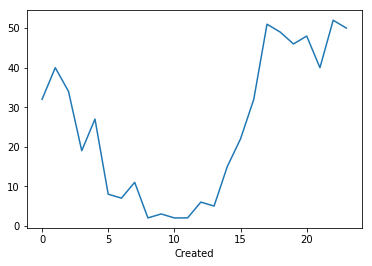

In [45]:
#Posts by hour of day
df_j['Account'].groupby(df_j['Created'].dt.hour).count().plot(kind='line')

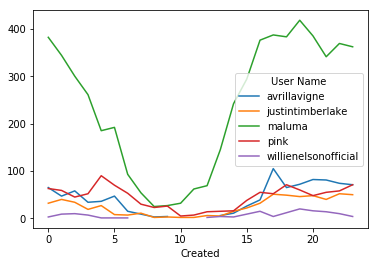

In [46]:
#Displaying for each user, their posts by hour aggregated for all time periods. 
df_top5.groupby(['User Name',df_top5['Created'].dt.hour]).count()['Account'].unstack('User Name').plot(kind='line')

#Users post heavily beginning around 10-11am and start slowing down around 8pm.

[]

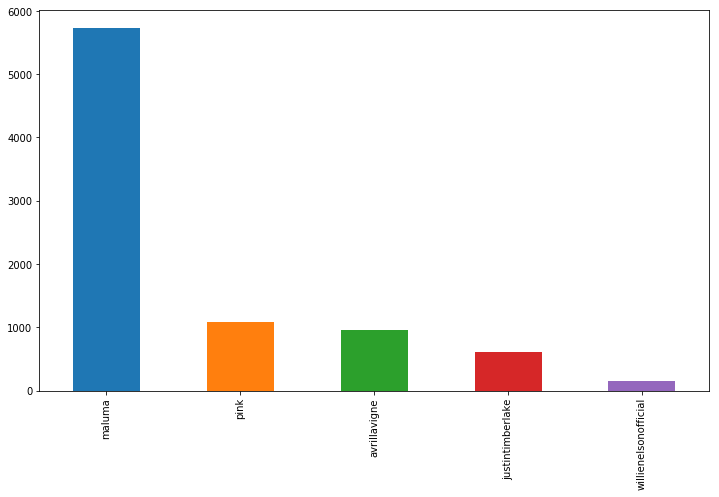

In [47]:
fig, ax = plt.subplots(figsize=(12,7))
df_top5['User Name'].value_counts().plot(ax=ax,kind='bar')
plt.plot()

##### Just for Justin Timberlake

In [48]:
#Have to change index to datetime in order to do groupings I want
df_j.index = df_j['Created'] 

In [49]:
df_j = df_j.resample('M', how='count')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


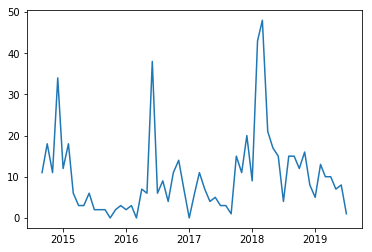

In [50]:
plt.plot(df_j.index,df_j['Account'])

###### For Top 5 artists

In [51]:
df_top5.index = df_top5['Created']

In [52]:
df_top5['month'] = df_top5['Created'].dt.month
df_top5['year'] = df_top5['Created'].dt.year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
df_top5.sample(5)

,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Description,Sponsor Id,Sponsor Name,Score,month,year
Created,,,,,,,,,,,,,,,,,
2019-01-13 01:00:00,Justin Timberlake,justintimberlake,53327231.0,2019-01-13 01:00:00,Photo,625574,3853,0,https://www.instagram.com/p/Bsjji02hYK8/,https://www.instagram.com/p/Bsjji02hYK8/,https://scontent.xx.fbcdn.net/v/t51.2885-15/50...,Wearing Memphis blue tonight,NaN,NaN,1.12,1,2019
2018-11-21 06:00:00,P!NK,pink,5181739.0,2018-11-21 06:00:00,Photo,327202,2259,0,https://www.instagram.com/p/Bqbny1bBJa9/,https://www.instagram.com/p/Bqbny1bBJa9/,https://scontent.cdninstagram.com/vp/ecd6d4aff...,"When it comes to children: 1 is 1, and 2 is 10...",NaN,NaN,1.31,11,2018
2016-07-10 16:00:00,Avril Lavigne,avrillavigne,3511411.0,2016-07-10 16:00:00,Video,85638,2335,220458,https://www.instagram.com/p/BHsAYgzAuRT/,https://www.instagram.com/p/BHsAYgzAuRT/,https://scontent.cdninstagram.com/t51.2885-15/...,Some of my babies 🎸🎸🎸🎸,NaN,NaN,-1.1,7,2016
2017-12-17 02:00:00,MALUMA,maluma,30069876.0,2017-12-17 02:00:00,Album,270721,1118,0,https://www.instagram.com/p/BcyS1Cmlppb/,https://www.instagram.com/p/BcyS1Cmlppb/,https://scontent.xx.fbcdn.net/v/t51.2885-15/25...,"Yo te escuchaba cuando tenia solo 15 años, soñ...",NaN,NaN,-2.9,12,2017
2015-05-10 15:00:00,MALUMA,maluma,NaN,2015-05-10 15:00:00,Video,77438,2540,0,https://www.instagram.com/p/2gbr1TR-j7/,https://www.instagram.com/p/2gbr1TR-j7/,https://scontent.cdninstagram.com/hphotos-xfa1...,TAS-TAS-TEO 😂😂😂 @pipebueno10,NaN,NaN,-3.58,5,2015


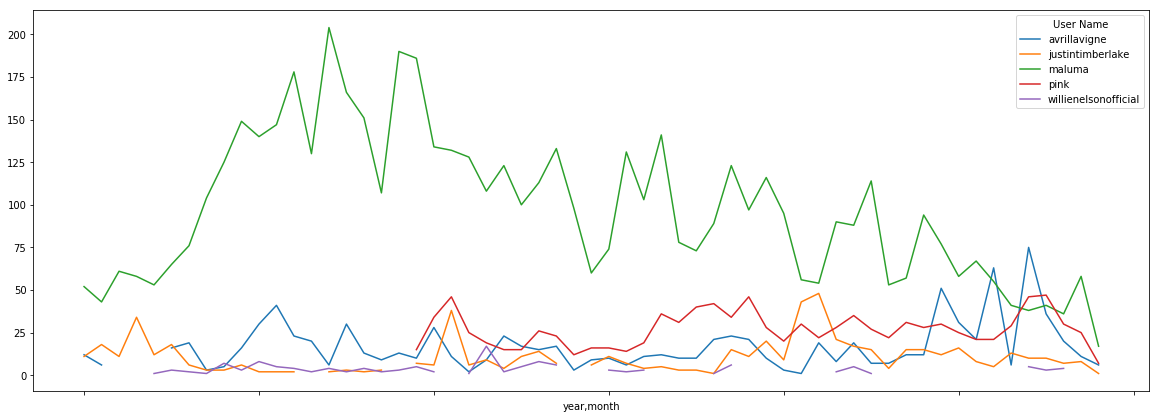

In [54]:
a = df_top5.groupby(['year','month','User Name']).count()['Account'].unstack('User Name')
df_top5.groupby(['year','month','User Name']).count()['Account'].unstack('User Name').plot(figsize=(20,7))

#how to get x axis to be more detailed... not working
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))


#would love to put dots where we had album / track releases... how to do?? Code below not functional
markers_on = [50, 70, 90, 1000]
plt.plot(markevery=markers_on)
plt.show()

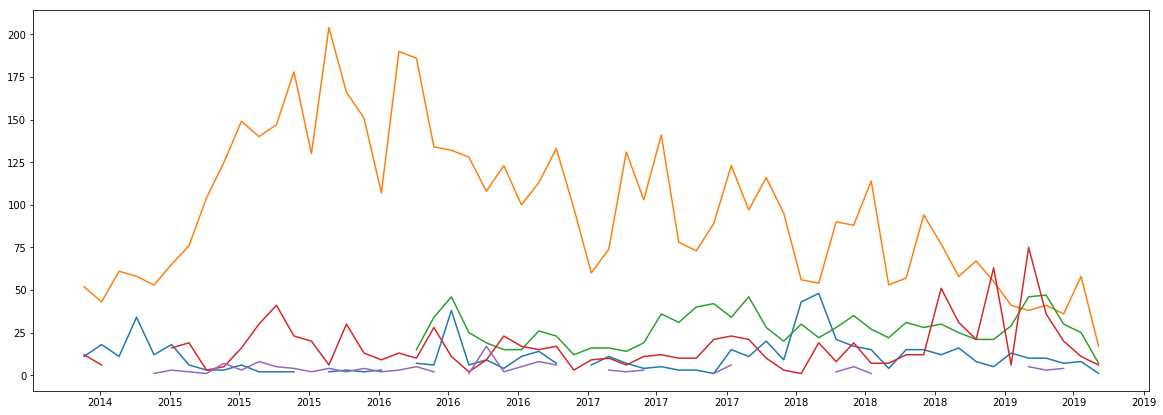

In [55]:
#Trying to do the above plot in a different way so I can control the x axis
daterange = pd.date_range(min(df_top5['Created']),max(df_top5['Created']),periods=len(a))
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
markers_on = [1,10, 50, 70]
for name in top_5:
    ax.plot(daterange,a[name])
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) #how to get to show months instead?

In [56]:
daterange.shape

(59,)

In [57]:
a[name].shape

(59,)

##### Number of Followers Review

In [58]:
df_top5.shape

(8503, 17)

In [59]:
print("NAs for # of followers: ", df_top5['Followers at Posting'].isna().sum())

NAs for # of followers:  1930
